In [1]:
# LSTM 모델링

from tensorflow.keras.layers import LSTM, Embedding, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_words = 10000
maxlen_for_padding = 500

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_words)

train_x = sequence.pad_sequences(train_x, maxlen=maxlen_for_padding)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen_for_padding)

model = Sequential()
model.add(Embedding(max_words, 32, input_length = maxlen_for_padding))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics=["acc"])

history = model.fit(train_x, train_y, batch_size = 128, epochs = 10, validation_split = 0.2)
model.summary()

Epoch 1/10
157/157 [==============================] - 85s 541ms/step - loss: 0.5208 - acc: 0.7411 - val_loss: 0.3631 - val_acc: 0.8548
Epoch 2/10
157/157 [==============================] - 83s 529ms/step - loss: 0.3066 - acc: 0.8800 - val_loss: 0.2907 - val_acc: 0.8848
Epoch 3/10
157/157 [==============================] - 82s 523ms/step - loss: 0.2394 - acc: 0.9108 - val_loss: 0.3192 - val_acc: 0.8772
Epoch 4/10
157/157 [==============================] - 86s 550ms/step - loss: 0.2063 - acc: 0.9218 - val_loss: 0.4281 - val_acc: 0.8530
Epoch 5/10
157/157 [==============================] - 90s 573ms/step - loss: 0.1760 - acc: 0.9367 - val_loss: 0.3331 - val_acc: 0.8856
Epoch 6/10
157/157 [==============================] - 98s 621ms/step - loss: 0.1592 - acc: 0.9419 - val_loss: 0.2935 - val_acc: 0.8902
Epoch 7/10
157/157 [==============================] - 96s 613ms/step - loss: 0.1473 - acc: 0.9486 - val_loss: 0.3437 - val_acc: 0.8668
Epoch 8/10
157/157 [==============================] - 1

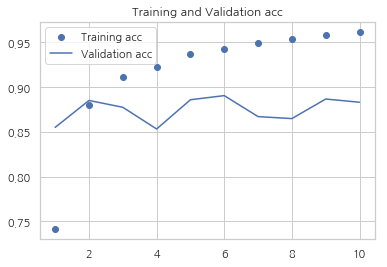

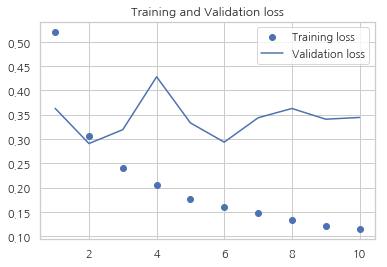

In [2]:
%matplotlib inline

acc = history.history["acc"]
loss = history.history["loss"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]

epochs = list(range(1, len(acc) + 1))

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.legend()
plt.title("Training and Validation acc")

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.legend()
plt.title("Training and Validation loss")

plt.show()